# Telecom Churn - ML Group Case Study

### Problem Statement

- Reduce churn rate for high value customers
- The dataset is of Indian and southeast Asian market
- Churn Phases
 - In `good` phase the customer is happy with the service and behaves as usual
 - In `action` phase The customer experience starts to sore in this phase
 - In `churn` phase the customer is said to have churned

### Result 

- Recommend strategies to manage customer churn

In [ ]:
#import Lib's
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np # linear algebra
import os # accessing directory structure


%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')

### Import data

In [ ]:
# https://drive.google.com/u/0/uc?id=1SWnADIda31mVFevFcfkGtcgBHTKKI94J&export=download

df = pd.read_csv("https://drive.google.com/u/0/uc?id=1SWnADIda31mVFevFcfkGtcgBHTKKI94J&export=download", encoding = "ISO-8859-1", low_memory=False )


In [ ]:
df_data =  df.copy()

df_data.head(10)



,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,...,150.76,109.61,0.00,212.17,212.17,212.17,nan,212.17,212.17,212.17,nan,0.00,0.00,0.00,nan,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.00,1.00,1.00,nan,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.05,355.07,268.32,86.28,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,...,0.00,0.00,0.00,nan,0.00,0.00,nan,nan,28.61,7.60,nan,nan,0.00,0.00,nan,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,nan,1.00,1.00,nan,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.69,189.06,210.23,290.71,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,0.00,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,...,0.00,0.00,8.42,nan,nan,nan,2.84,nan,nan,nan,0.00,nan,nan,nan,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,nan,nan,nan,1.00,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.34,251.10,508.05,389.50,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.00,54.86,44.38,0.00,0.00,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,...,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.64,309.88,238.17,163.43,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.00,nan,nan,nan,1526,0.00,0.00,0.00,0.00
5,7000286308,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,50.26,58.81,83.39,170.83,50.16,43.63,85.48,138.79,19.28,13.44,14.46,46.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.16,43.63,85.48,138.79,16.39,8.83,12.38,44.78,0.00,0.00,0.00,...,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,1471,0.00,0.00,0.00,0.00
6,7001051193,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,429.02,190.70,255.11,114.75,71.03,45.03,76.66,15.23,262.73,49.24,92.08,50.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,71.03,45.03,76.14,15.23,252.23,48.71,80.63,50.33,10.38,0.00,0.00,...,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,1673,0.00,0.00,0.00,0.00
7,7000701601,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.18,1349.85,3171.48,500.00,57.84,54.68,52.29,nan,453.43,567.16,325.91,nan,16.23,33.49,31.64,nan,23.

In [ ]:
print (df_data.shape)


(99999, 226)


In [ ]:
df_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

### Observation

- There are 99999 rows and 226 columns in the data.
- Lot of them are numeric
- We need to inspect the categorical columns and take necessary actions.


In [ ]:
df_data.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,...,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.00,99999.00,98981.00,98981.00,98981.00,99999,99398,98899,98340,99999.00,99999.00,99999.00,99999.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,...,99999.00,99999.00,99999.00,25153.00,25571.00,26339.00,25922.00,25153.00,25571.00,26339.00,25922.00,25153.00,25571.00,26339.00,25922.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,25153.00,25571.00,26339.00,25922.00,99999.00,99999.00,99999.00,99999.00,99999.00
unique,nan,nan,nan,nan,nan,1,1,1,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,nan,nan,nan,nan,nan,6/30/2014,7/31/2014,8/31/2014,9/30/2014,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,nan,nan,nan,nan,nan,99999,99398,98899,98340,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,7001207270.39,109.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,282.99,278.54,279.15,261.65,132.40,133.67,133.02,130.30,197.94,197.05,196.57,190.34,9.95,7.15,7.29,6.34,13.91,9.82,9.97,8.56,47.10,46.47,45.89,44.58,93.34,91.40,91.76,90.46,3.75,3.79,3.68,...,129.00,135.41,136.06,89.56,89.38,91.17,100.26,86.40,85.91,86.60,93.71,0.03,0.02,0.02,0.02,0.08,0.08,0.08,0.07,0.39,0.44,0.45,0.39,0.08,0.08,0.08,0.09,0.07,0.08,0.08,0.08,0.91,0.91,0.89,0.86,1219.85,68.17,66.84,60.02,3.30
std,695669.39,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,328.44,338.16,344.47,342.00,297.21,308.79,308.95,308.48,316.85,325.86,327.17,319.40,72.83,73.45,68.40,57.14,71.44,58.46,64.71,58.44,150.86,155.32,151.18,148.00,162.78,157.49,156.54,158.68,14.23,14.26,13.27,...,541.49,558.78,577.39,193.12,195.89,188.18,216.29,172.77,176.38,168.25,171.38,0.16,0.15,0.14,0.13,0.30,0.30,0.30,0.28,1.50,1.64,1.63,1.35,0.36,0.39,0.38,0.38,0.57,0.63,0.66,0.65,0.28,0.29,0.31,0.35,954.73,267.58,271.20,253.94,32.41
min,7000000074.00,109.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,-2258.71,-2014.05,-945.81,-1899.51,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,-30.82,

### Filter High value customers

- We will use the recharge column to filter high value customer.

In [ ]:
# find the recharge cols

recharge_cols = [col for col in df_data.columns if 'total_rech_' in col]
print(recharge_cols)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9']


In [ ]:
#Derive Total Data Recharge Amounts

df_data["total_rech_data_amt_6"] = df_data["total_rech_data_6"]  * df_data['av_rech_amt_data_6']
df_data["total_rech_data_amt_7"] = df_data["total_rech_data_7"]  * df_data['av_rech_amt_data_7']
df_data["total_rech_data_amt_8"] = df_data["total_rech_data_8"]  * df_data['av_rech_amt_data_8']
df_data["total_rech_data_amt_9"] = df_data["total_rech_data_9"]  * df_data['av_rech_amt_data_9']

In [ ]:
# Drop total_rech_data_* and av_rech_amt_data_*
drop_col = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
df_data.drop(drop_col, axis=1, inplace=True)

In [ ]:
#Average of Recharge Amount in 6th and 7th Month
avg_rec_amt_6n7 = (df_data["total_rech_amt_6"].fillna(0) + df_data["total_rech_data_amt_6"].fillna(0) + 
df_data["total_rech_amt_7"].fillna(0) + df_data["total_rech_data_amt_7"].fillna(0))/2.0

#70th Percentile of Avg Recharge Amount
pc70_6n7 = np.percentile(avg_rec_amt_6n7, 70.0)
print('70 percentile of 6th and 7th months avg recharge amount: ', pc70_6n7)

df_cust = df_data[avg_rec_amt_6n7 >= pc70_6n7]
print('Dataframe Shape after Filtering HIgh Value Customers: ', df_cust.shape)

70 percentile of 6th and 7th months avg recharge amount:  478.0
Dataframe Shape after Filtering HIgh Value Customers:  (30001, 222)


# Data Cleaning and EDA

In [ ]:
#Remove Data which has only 1 unique Value

#List of columns with only 1 unqiue value
col_list = df_cust.loc[:,df_cust.apply(pd.Series.nunique) == 1]
col_list.head(5)



,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9
0,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,nan,nan,0.00,nan,nan,nan,0.00,nan
7,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.00,0.00,0.00,nan,0.00,0.00,0.00,nan
8,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
21,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
23,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
#Remove Columns with only 1 unique value
df_cust = df_cust.loc[:,df_cust.apply(pd.Series.nunique) != 1]
df_cust.shape

(30001, 206)

In [ ]:
df_cust.dtypes

mobile_number              int64
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
arpu_9                   float64
                          ...   
sep_vbc_3g               float64
total_rech_data_amt_6    float64
total_rech_data_amt_7    float64
total_rech_data_amt_8    float64
total_rech_data_amt_9    float64
Length: 206, dtype: object

In [ ]:
#Check for Columns that can be changed to integers, floats or other types
object_col_data = df_cust.select_dtypes(include=['object'])
print(object_col_data.iloc[0])


date_of_last_rech_6         6/21/2014
date_of_last_rech_7         7/16/2014
date_of_last_rech_8          8/8/2014
date_of_last_rech_9         9/28/2014
date_of_last_rech_data_6    6/21/2014
date_of_last_rech_data_7    7/16/2014
date_of_last_rech_data_8     8/8/2014
date_of_last_rech_data_9          NaN
Name: 0, dtype: object


In [ ]:
# convert to datetime
for col in object_col_data.columns:
    df_cust[col] = pd.to_datetime(df_cust[col])

df_cust.shape


(30001, 206)

### Handling missing values

- Drop columns with 30% missing values
- We have threshold of 0.7 i.e 70% we decided to drop the 30% of the missing values then we might inpute the values if needed.



In [ ]:
#Drop Columns with > 30% of missing values and not for 9th Month
columns = df_cust.columns
per_missing = df_cust.isnull().sum() * 100 / len(df_cust)
print(per_missing)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'per_missing': per_missing})

drop_col = missing_value_df.loc[(missing_value_df["column_name"].str.contains('_9')==False) & (missing_value_df["per_missing"] > 30.0)]["column_name"]
drop_col

mobile_number            0.00
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
                         ... 
sep_vbc_3g               0.00
total_rech_data_amt_6   44.15
total_rech_data_amt_7   43.15
total_rech_data_amt_8   46.83
total_rech_data_amt_9   49.27
Length: 206, dtype: float64


date_of_last_rech_data_6    date_of_last_rech_data_6
date_of_last_rech_data_7    date_of_last_rech_data_7
date_of_last_rech_data_8    date_of_last_rech_data_8
max_rech_data_6                      max_rech_data_6
max_rech_data_7                      max_rech_data_7
max_rech_data_8                      max_rech_data_8
count_rech_2g_6                      count_rech_2g_6
count_rech_2g_7                      count_rech_2g_7
count_rech_2g_8                      count_rech_2g_8
count_rech_3g_6                      count_rech_3g_6
count_rech_3g_7                      count_rech_3g_7
count_rech_3g_8                      count_rech_3g_8
arpu_3g_6                                  arpu_3g_6
arpu_3g_7                                  arpu_3g_7
arpu_3g_8                                  arpu_3g_8
arpu_2g_6                                  arpu_2g_6
arpu_2g_7                                  arpu_2g_7
arpu_2g_8                                  arpu_2g_8
night_pck_user_6                    night_pck_

In [ ]:
df_cust.drop(drop_col, axis=1, inplace=True)
df_cust.shape

(30001, 179)

In [ ]:
# look at missing value ratio in each column
df_cust.isnull().sum()*100/df_cust.shape[0]

mobile_number            0.00
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
                         ... 
aug_vbc_3g               0.00
jul_vbc_3g               0.00
jun_vbc_3g               0.00
sep_vbc_3g               0.00
total_rech_data_amt_9   49.27
Length: 179, dtype: float64

In [ ]:
### Let's drop the column with high correlation between them

In [ ]:
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.tril.html

cor = df_cust.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
print(cor[(cor > 0.60) | (cor < -0.60)].sort_values())

monthly_3g_6      vol_3g_mb_6        0.60
total_ic_mou_7    loc_ic_t2t_mou_7   0.60
arpu_2g_9         count_rech_3g_9    0.60
total_og_mou_8    onnet_mou_9        0.60
total_rech_amt_8  arpu_6             0.60
                                     ... 
isd_og_mou_8      isd_og_mou_7       0.95
                  isd_og_mou_6       0.95
total_rech_amt_9  arpu_9             0.95
total_rech_amt_8  arpu_8             0.96
sachet_2g_9       count_rech_2g_9    0.98
Length: 337, dtype: float64


In [ ]:
drop_col_list = ['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9','std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9','arpu_2g_9','count_rech_2g_9','count_rech_3g_9','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2f_mou_9',
                'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2m_mou_9','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
                 
df_cust.drop(drop_col_list, axis=1, inplace=True)
df_cust.shape

(30001, 124)

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(data, graphWidth):
    name = "Telecom Churn"
    data = data.dropna('columns') # drop columns with NaN
    data = data[[col for col in data if data[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if data.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({data.shape[1]}) is less than 2')
        return
    corr = data.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {name}', fontsize=15)
    plt.show()

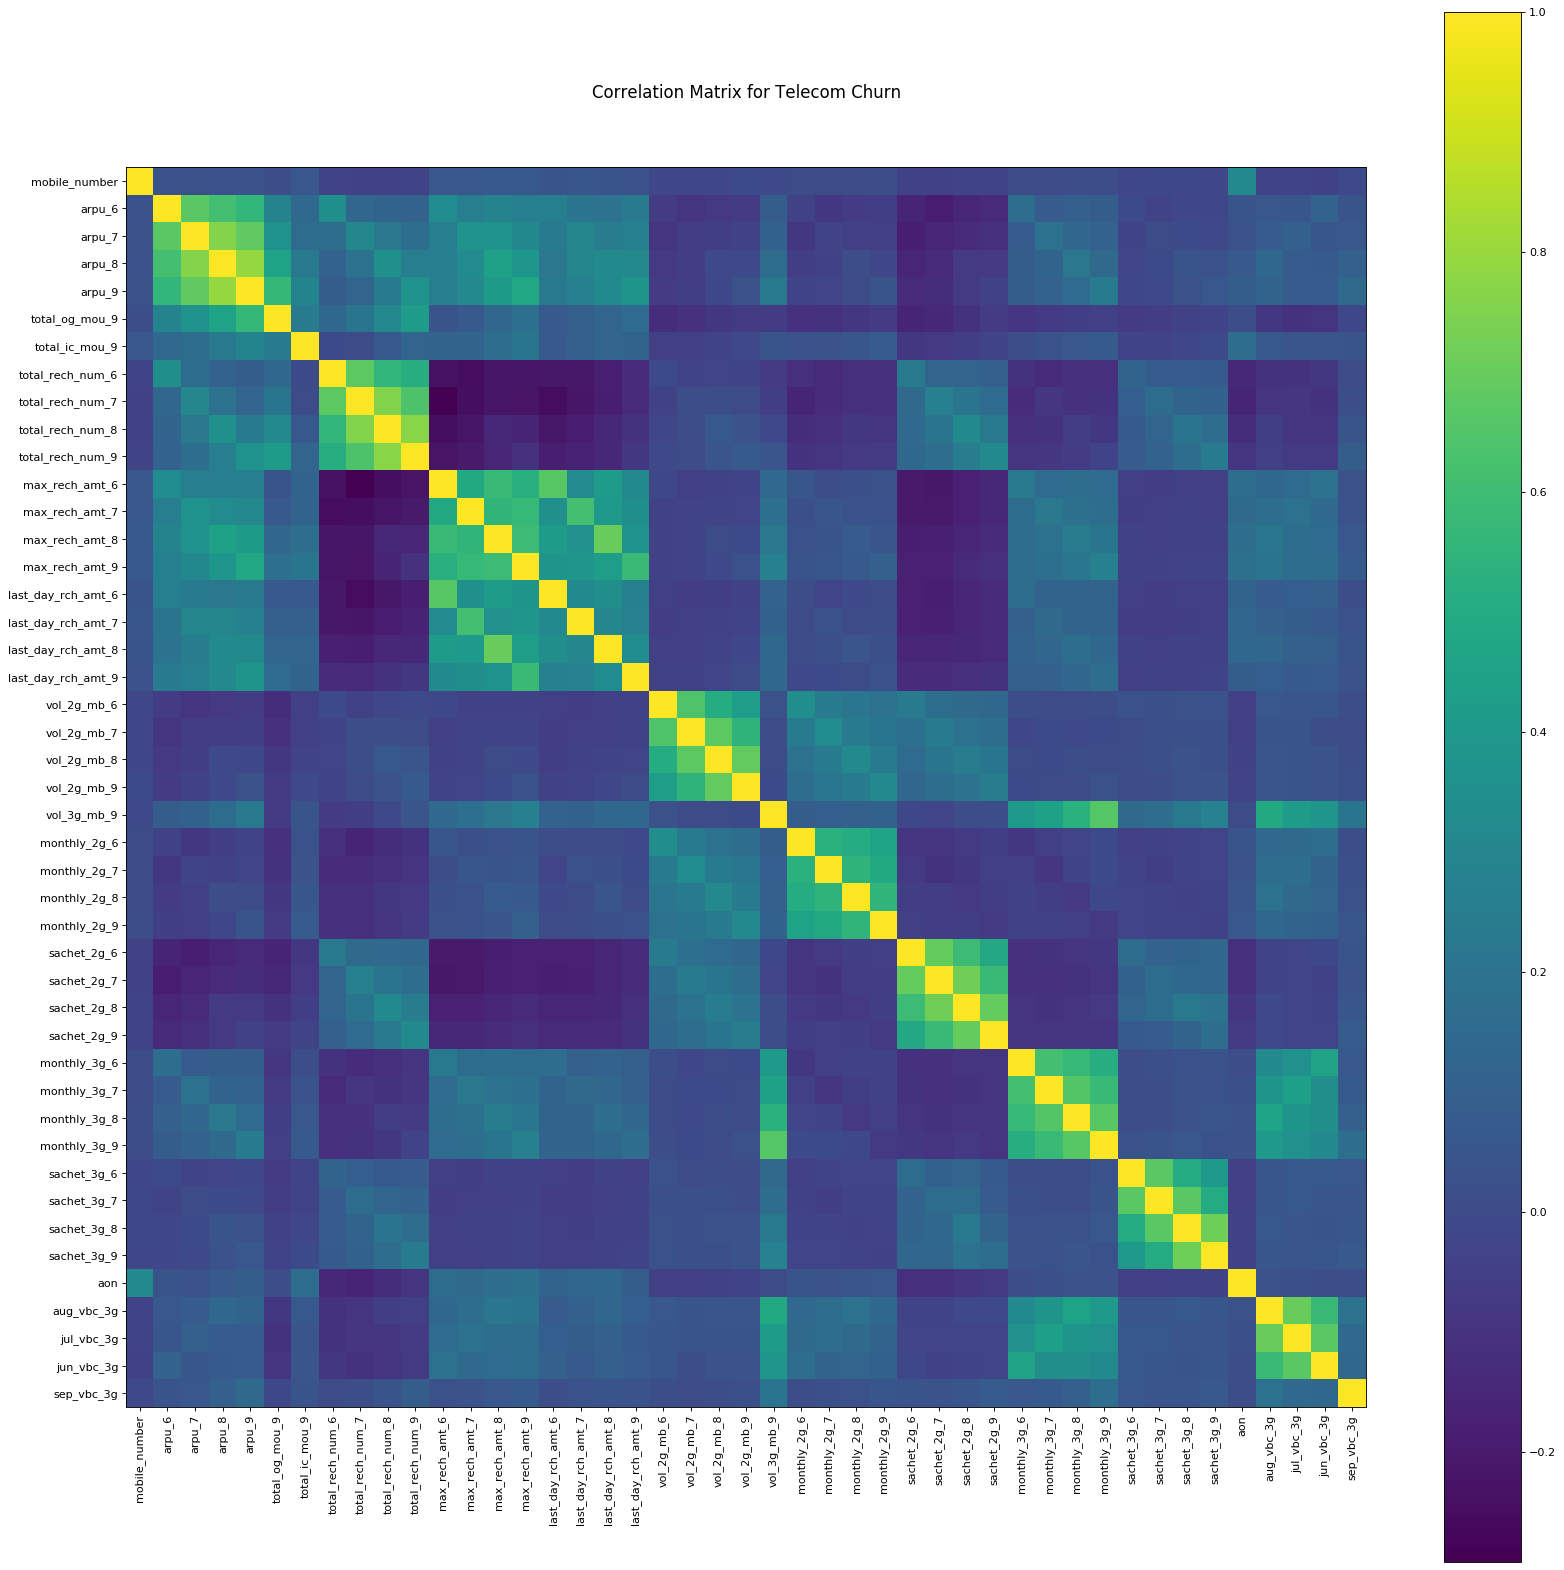

In [ ]:
plotCorrelationMatrix(df_cust, 25)


## Tag Churners

In [ ]:
df_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()


,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00
8,34.91,142.18,0.00,0.00
21,252.61,1031.53,0.00,0.00
23,127.48,127.63,13.93,314.74


In [ ]:
#churned customers (churn=1, else 0) 
df_cust['churn'] = np.where(df_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 
                                   1,
                                   0)

In [ ]:
df_cust['churn'].head()


0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

In [ ]:
#Remove All 9th Month related columns
drop_cols = [col for col in df_cust.columns if '_9' in col]
print(drop_cols)

df_cust.drop(drop_cols, axis=1, inplace=True)

df_cust.shape

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'max_rech_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'total_rech_data_amt_9']


(30001, 88)

In [ ]:
#Rename Columns with Meaning full Names
# aug_vbc_3g jul_vbc_3g jun_vbc_3g sep_vbc_3g

df_cust.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

Text(0.5, 1.0, 'Churn Distribution')

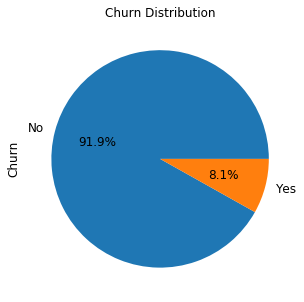

In [ ]:
#Churn Distribution
ax = (df_cust['churn'].value_counts()*100.0 /len(df_cust)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           

ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)

### Observation

- In our data, 92% of the customers do not churn. 
- Clearly the data is skewed as we would expect a large majority of the customers to not churn. 
- This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives. - We will see in the modelling section on how to avoid skewness in the data.

In [ ]:
# Reduce the number of columns by creating meaningful columns

In [ ]:
col_list = df_cust.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()

print (df_cust.shape)

col_list

(30001, 88)


Index(['arpu', 'arpu', 'onnet_mou', 'onnet_mou', 'offnet_mou', 'offnet_mou',
       'roam_ic_mou', 'roam_ic_mou', 'roam_og_mou', 'roam_og_mou',
       'loc_og_t2c_mou', 'loc_og_t2c_mou', 'loc_og_mou', 'loc_og_mou',
       'std_og_t2f_mou', 'std_og_t2f_mou', 'std_og_mou', 'std_og_mou',
       'isd_og_mou', 'isd_og_mou', 'spl_og_mou', 'spl_og_mou', 'og_others',
       'og_others', 'loc_ic_mou', 'loc_ic_mou', 'std_ic_t2t_mou',
       'std_ic_t2t_mou', 'std_ic_t2f_mou', 'std_ic_t2f_mou', 'std_ic_mou',
       'std_ic_mou', 'spl_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'isd_ic_mou',
       'ic_others', 'ic_others', 'total_rech_num', 'total_rech_num',
       'max_rech_amt', 'max_rech_amt', 'last_day_rch_amt', 'last_day_rch_amt',
       'vol_2g_mb', 'vol_2g_mb', 'monthly_2g', 'monthly_2g', 'sachet_2g',
       'sachet_2g', 'monthly_3g', 'monthly_3g', 'sachet_3g', 'sachet_3g',
       'vbc_3g', 'vbc_3g'],
      dtype='object')

In [ ]:
for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    df_cust[avg_col_name] = (df_cust[col_6]  + df_cust[col_7])/ 2

arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2c_mou
loc_og_mou
std_og_t2f_mou
std_og_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_mou
std_ic_t2t_mou
std_ic_t2f_mou
std_ic_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
max_rech_amt
last_day_rch_amt
vol_2g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
vbc_3g


In [ ]:
print (df_cust.shape)

(30001, 116)


In [ ]:
col_list = df_cust.filter(regex='_6|_7').columns

df_cust.drop(col_list, axis=1, inplace=True)
df_cust.shape

(30001, 60)

In [ ]:
df_cust.head(10)


,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,vbc_3g_9,churn,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67
0,7000842753,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,2,252,252,5.75,0,0,1,0,968,30.40,3.58,1,206.10,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,3.50,252.00,252.00,15.72,0.00,0.00,1.00,0.00,50.60
7,7000701601,3171.48,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.00,188.04,30.39,22.21,193.94,0.00,31.59,15.14,7,1580,779,0.00,0,0,0,0,802,57.74,0.00,1,1209.51,56.26,510.29,24.86,18.16,0.00,478.03,13.37,68.00,0.09,2.25,0.00,391.56,24.36,43.22,176.81,0.10,8.29,15.46,5.00,1185.00,0.00,0.00,0.00,0.00,0.00,0.00,19.06
8,7001524846,137.36,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.00,15.79,0.10,0.00,0.75,0.00,0.00,0.00,14,30,10,0.03,0,3,0,0,315,21.03,0.00,0,435.47,382.36,87.64,0.00,0.00,0.00,333.13,0.00,136.87,0.00,0.00,0.00,52.63,0.29,0.00,13.54,0.00,0.00,0.00,20.00,122.00,25.00,178.00,0.50,0.50,0.00,0.00,516.40
21,7002124215,637.76,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.00,159.11,0.18,0.00,101.93,0.00,0.00,0.00,27,50,50,0.00,0,0,0,0,720,0.00,0.00,0,556.10,117.26,827.30,0.00,0.00,0.00,95.56,0.00,848.99,0.00,0.00,0.00,106.50,10.02,0.00,62.98,0.00,0.00,0.00,24.00,50.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00
23,7000887461,366.97,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.00,224.21,13.38,0.00,57.29,0.00,3.74,13.06,4,179,0,0.01,0,0,1,1,604,40.45,0.00,0,134.12,49.81,87.38,0.00,0.00,0.00,132.80,0.00,4.35,0.01,0.05,0.00,145.52,0.26,0.00,8.92,0.00,14.12,2.67,4.00,89.50,89.50,0.24,0.00,0.00,1.00,0.00,25.93
33,7000149764,409.23,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.00,40.54,0.05,0.13,1.04,0.00,0.00,0.20,1,455,455,7.97,0,0,1,0,1328,358.10,0.00,0,1669.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.18,1.46,0.59,4.42,0.00,0.00,0.94,10.50,753.50,126.00,72.41,0.00,0.00,4.50,2.00,2210.75
38,7000815202,393.91,666.38,97.81,0.00,0.00,0.00,28.44,0.00,735.74,0.00,0.00,0.00,29.43,5.59,0.00,19.01,0.00,1.20,0.00,6,130,130,0.00,0,0,0,0,1155,0.00,0.00,0,425.27,434.48,69.72,0.00,0.00,0.00,48.59,0.00,455.61,0.00,0.00,0.00,37.61,11.95,0.00,22.22,0.00,9.54,0.00,24.50,70.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00
41,7000721289,229.77,80.44,136.69,0.00,0.00,0.00,203.21,13.18,13.18,0.74,0.00,0.00,60.64,0.00,0.00,0.00,0.00,145.94,0.35,3,150,110,0.00,0,0,0,0,2010,0.00,0.00,0,454.30,102.63,256.57,0.00,0.00,0.00,293.85,64.78,64.78,0.55,0.44,0.00,168.21,0.00,0.70,0.70,0.00,207.65,0.28,4.00,150.00,150.00,0.00,0.00,0.00,0.00,0.00,0.00
48,7000294396,179.22,156.91,68.18,0.00,0.00,0.00,95.69,0.00,129.39,0.00,0.00,0.00,154.26,13.36,0.00,16.88,0.00,0.00,0.00,3,130,130,0.00,0,0,0,0,1265,0.00,0.00,0,1224.60,1471.56,673.02,0.00,0.00,0.03,994.83,0.00,1149.52,0.00,1.46,0.72,836.27,32.81,0.00,47.22,0.00,0.00,0.00,9.00,250.00,180.00,0.00,0.00,0.00,0.00,0.00,0.00
53,7002188521,706.02,102.69,261.34,0.00,0.00,0.00,241.61,0.00,5.23,117.19,0.00,0.00,534.24,0.00,0.00,10.63,0.00,0.00,0.00,14,130,130,0.00,0,1,0,0,697,0.00,0.00,0,1059.69,127.36,511.25,0.00,0.00,2.

In [ ]:
#Conevrt AON in Months
df_cust['aon_mon'] = df_cust['aon']/30
df_cust.drop('aon', axis=1, inplace=True)
df_cust['aon_mon'].head()

0    32.27
7    26.73
8    10.50
21   24.00
23   20.13
Name: aon_mon, dtype: float64

### Univariate EDA

In [ ]:
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'


def univeda(var, stats=True):
    if data_type(var) == 'numerical':
        sns.distplot(var)
        if stats == True:
            print(var.describe())
    
    elif data_type(var) == 'categorical':
        sns.countplot(var)
        if stats == True:
            print(var.value_counts())
            
    else:
        print("Invalid var passed: either pass a numeric var or a categorical vairable.")

count   30001.00
mean      508.60
std       501.96
min      -945.81
25%       231.47
50%       427.58
75%       661.49
max     33543.62
Name: arpu_8, dtype: float64


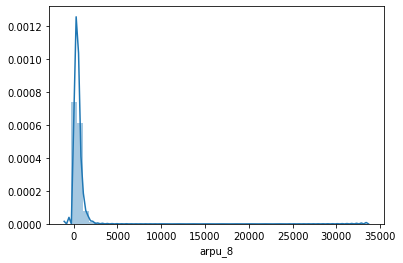

In [ ]:
univeda(df_cust.arpu_8)


count   28827.00
mean      243.65
std       465.20
min         0.00
25%        14.25
50%        72.93
75%       255.02
max     10752.56
Name: onnet_mou_8, dtype: float64


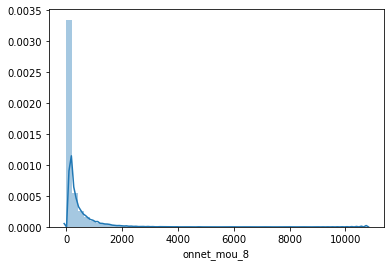

In [ ]:
univeda(df_cust.onnet_mou_8)


## Bivariate EDA

In [ ]:
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

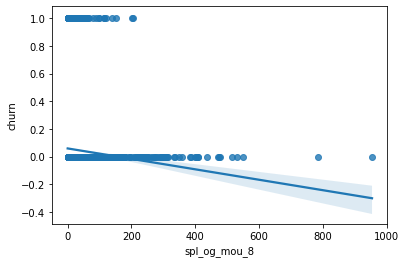

In [ ]:
bivariate(df_cust.spl_og_mou_8, df_cust.churn)


In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

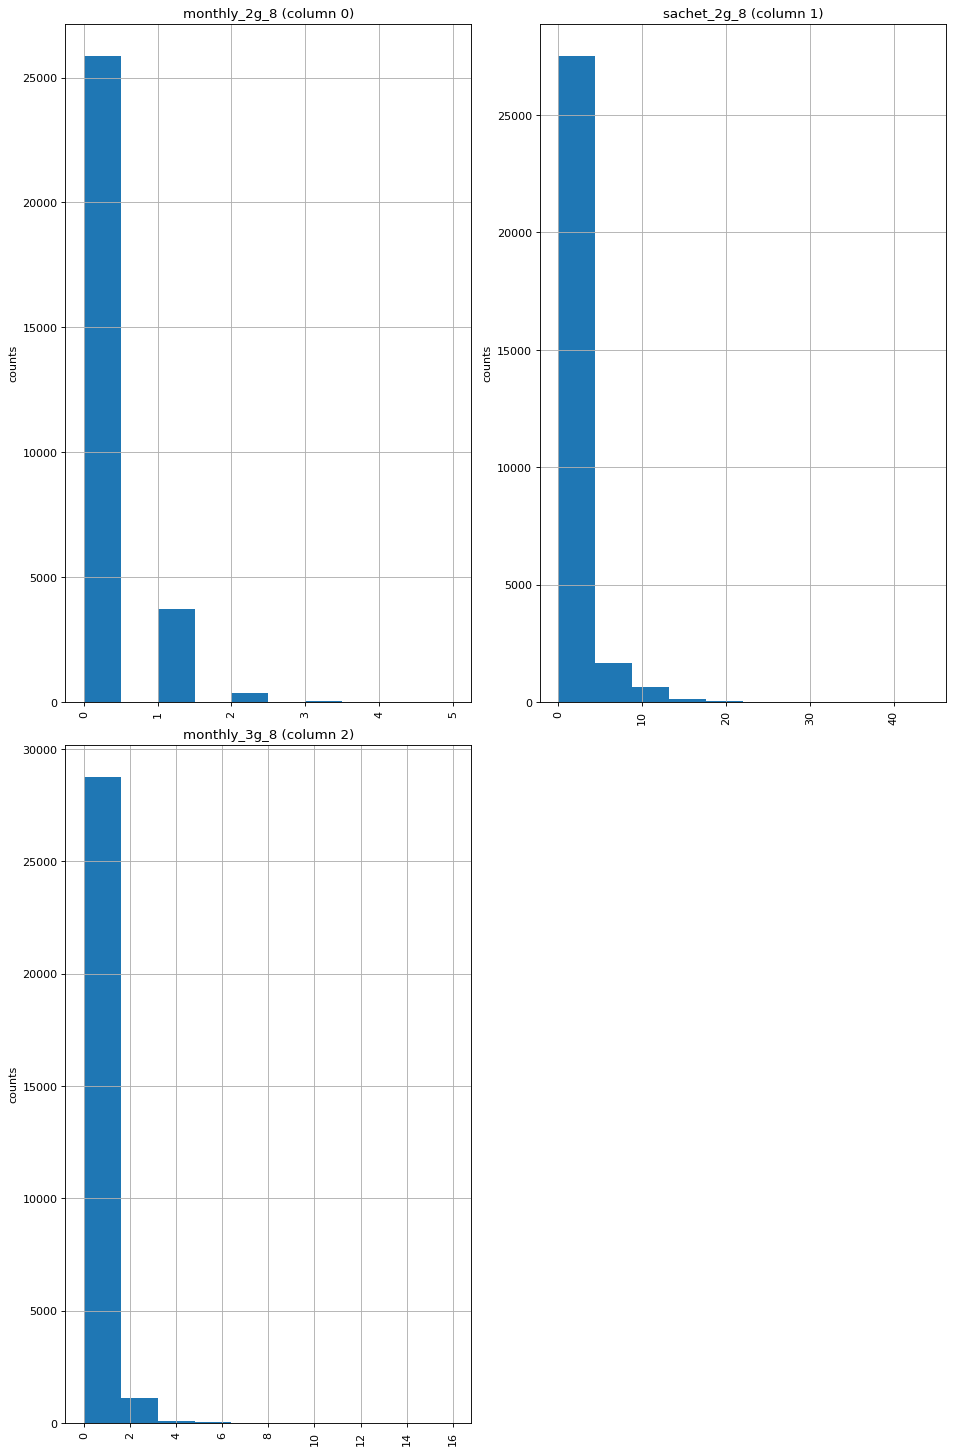

In [ ]:
plotPerColumnDistribution(df_cust, 3, 2)


In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

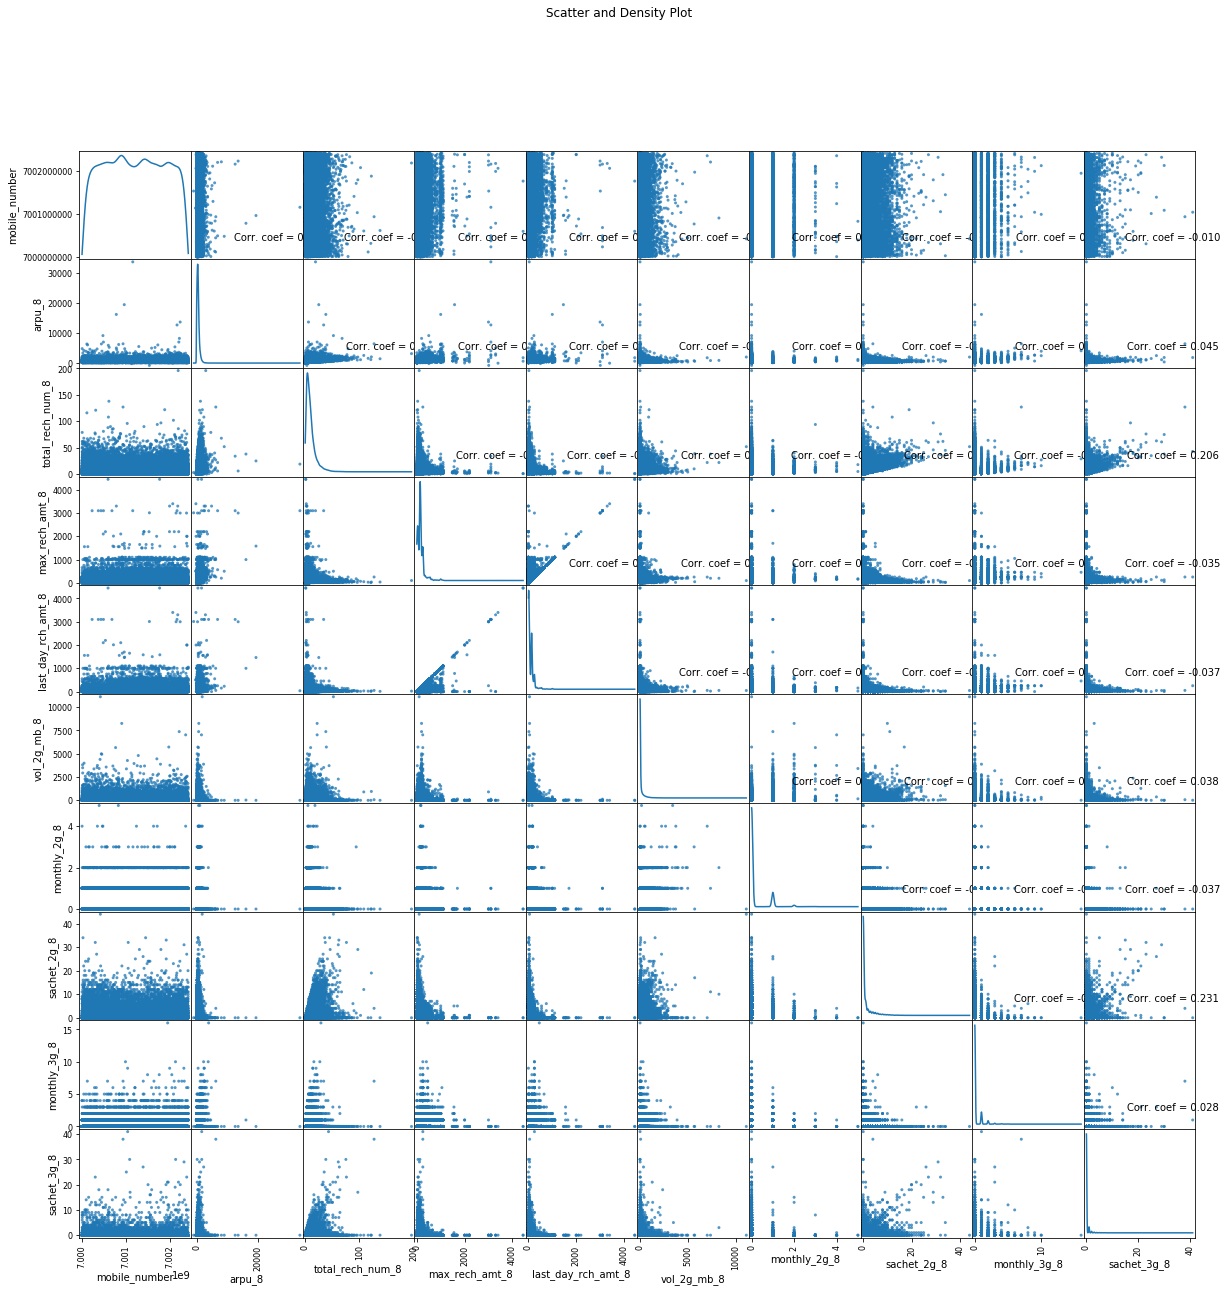

In [ ]:
plotScatterMatrix(df_cust, 20, 10)


Text(0.5, 1.0, 'Customers by their tenure')

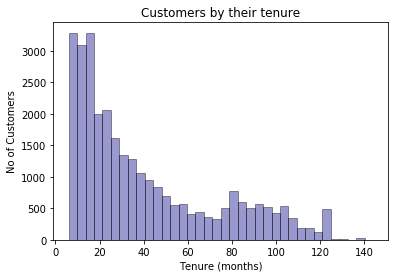

In [ ]:
ax = sns.distplot(df_cust['aon_mon'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Customers by their tenure')

### Observation 

- We can see that most of the customer has tenure of around 5-10 months

In [ ]:
### Let's change the tenure to years for meaningful insights

tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
df_cust['tenure_range'] = pd.cut(df_cust['aon_mon'], tn_range, labels=tn_label)
df_cust['tenure_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): [0-6 Months < 6-12 Months < 1-2 Yrs < 2-5 Yrs < 5 Yrs and above]

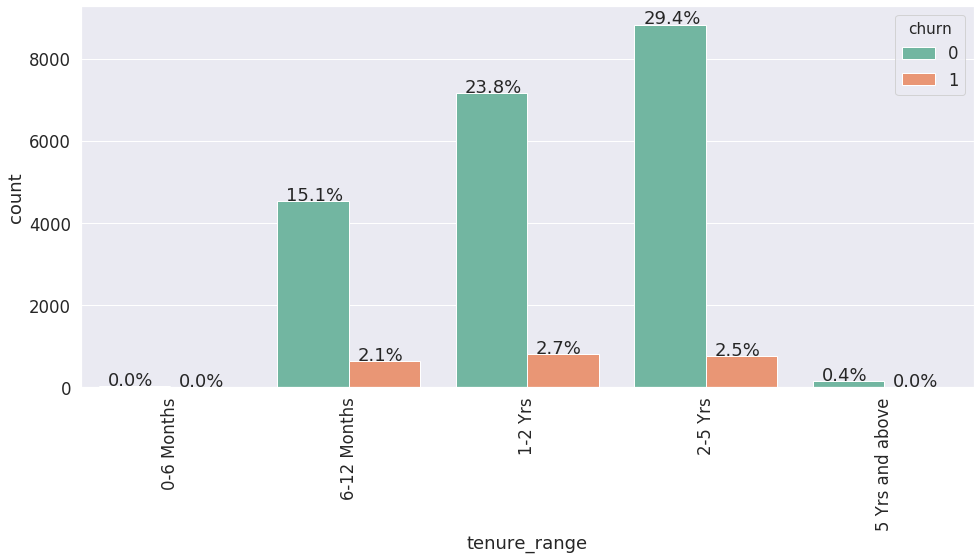

In [ ]:
sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

temp = pd.Series(data = 'tenure_range')
fig, ax = plt.subplots()
width = len(df_cust['tenure_range'].unique()) + 6 + 4*len(temp.unique())
fig.set_size_inches(width , 7)

total = float(len(df_cust.index))
ax = sns.countplot(x="tenure_range", data=df_cust, palette="Set2", hue = "churn");
for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df_cust))), (p.get_x()+0.05, p.get_height()+20))
plt.xticks(rotation=90)
plt.show()


### Observation

- Each year range has equally churn ratio

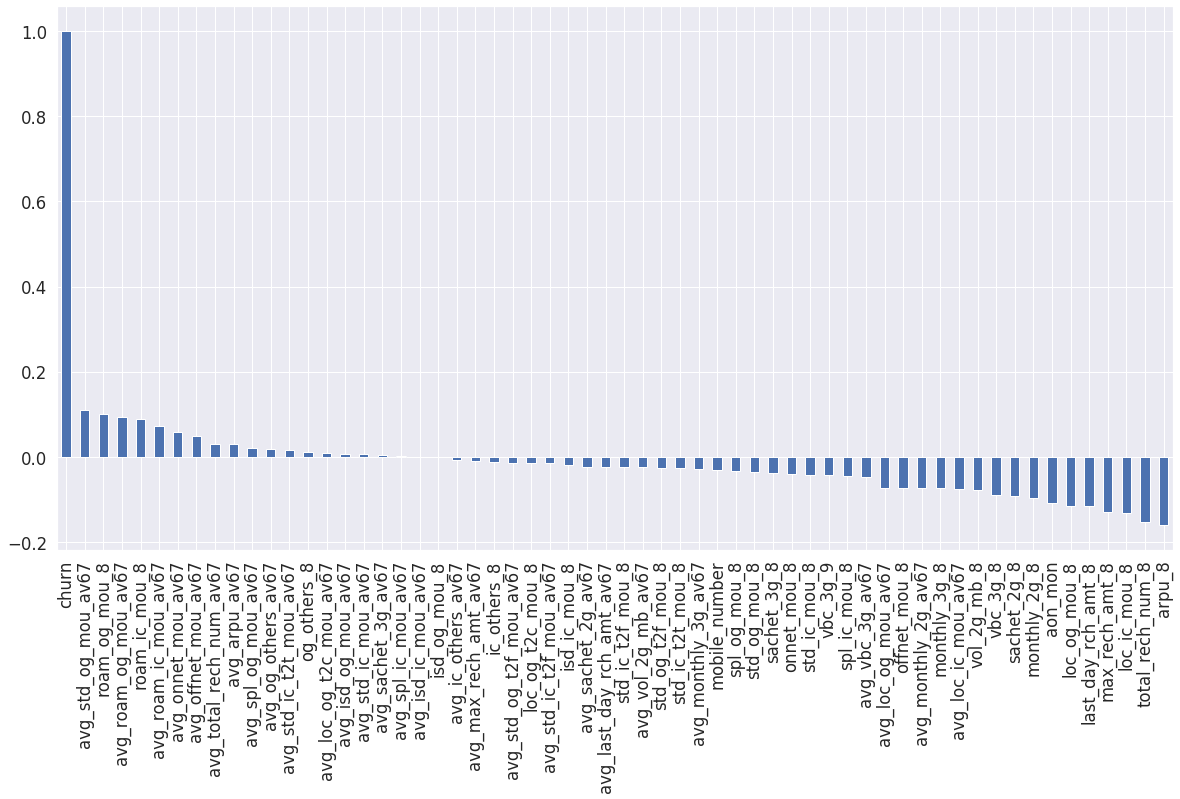

In [ ]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(20,10))
df_cust.corr()['churn'].sort_values(ascending = False).plot(kind='bar')


### Observation 

- Avg STD Outgoing Calls for Month 6 & 7, Outgoing calls in Roaming seems to be positively correlated with Churn.
- Avg Revenue, No Of Recharge for 8th Month seems to be negatively correlated.



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


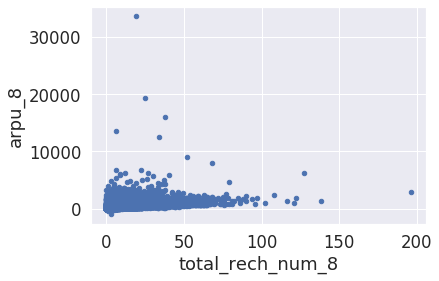

In [ ]:
# Lets look at the relation between total recharge in 8th Month Vs Average Revenue in 8th Month

df_cust[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


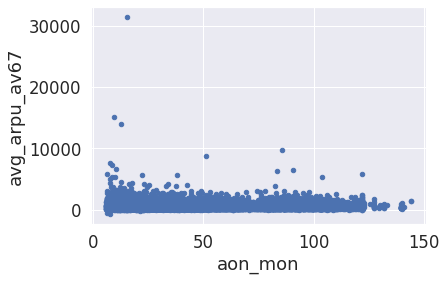

In [ ]:
# Lets look at the relation between Tenure And Revenue

df_cust[['aon_mon', 'avg_arpu_av67']].plot.scatter(x = 'aon_mon',
                                                              y='avg_arpu_av67')

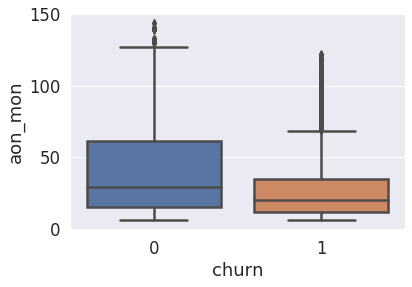

In [ ]:
# Variable: Tenure
sns.boxplot(x = df_cust.churn, y = df_cust.aon_mon)


### Observation 

-  We can see that customer who do not churn seems to have higher tenure with telecom industry

#### Variable - Volume based cost


Text(0.5, 1.0, 'Distribution of Volume based cost by churn')

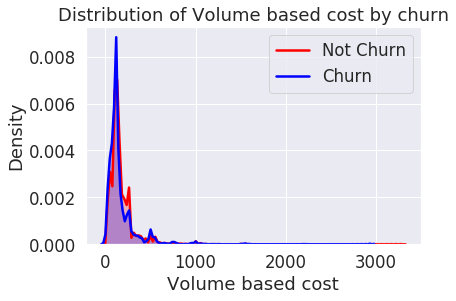

In [ ]:
ax = sns.kdeplot(df_cust.avg_max_rech_amt_av67[(df_cust["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(df_cust.avg_max_rech_amt_av67[(df_cust["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Volume based cost by churn')

### Observation

- Not differentiable

#### Variable - Recharge amount


Text(0.5, 1.0, 'Distribution of Max Recharge Amount by churn')

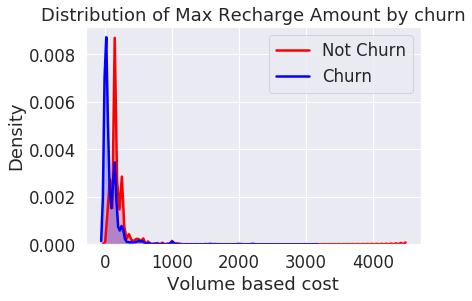

In [ ]:
ax = sns.kdeplot(df_cust.max_rech_amt_8[(df_cust["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(df_cust.max_rech_amt_8[(df_cust["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')

### observation

-  People who recharge less are likely to churn more.



# Modelling

In [ ]:
df_cust.groupby('churn').size()

churn
0    27560
1     2441
dtype: int64

In [ ]:
df_cust.isnull().sum()

mobile_number             0
arpu_8                    0
onnet_mou_8            1174
offnet_mou_8           1174
roam_ic_mou_8          1174
                       ... 
avg_monthly_3g_av67       0
avg_sachet_3g_av67        0
avg_vbc_3g_av67           0
aon_mon                   0
tenure_range           7176
Length: 61, dtype: int64

In [ ]:
#Lets Create New df for Model Building

df = df_cust[:].copy()
print(df_cust.groupby('churn').size())

# Drop tenure_range as we have AON MONTH also columns are highly coorelated
df.drop('tenure_range', axis=1, inplace=True)
df.drop('mobile_number', axis=1, inplace=True)

#Since All The Values are realted to Price/ Cost/ Amount, Filling NaN with 0

df.fillna(0, inplace=True)
print(df_cust.groupby('churn').size())

df.head()


churn
0    27560
1     2441
dtype: int64
churn
0    27560
1     2441
dtype: int64


,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,vbc_3g_8,vbc_3g_9,churn,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,aon_mon
0,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,2,252,252,5.75,0,0,1,0,30.40,3.58,1,206.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.50,252.00,252.00,15.72,0.00,0.00,1.00,0.00,50.60,32.27
7,3171.48,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.00,188.04,30.39,22.21,193.94,0.00,31.59,15.14,7,1580,779,0.00,0,0,0,0,57.74,0.00,1,1209.51,56.26,510.29,24.86,18.16,0.00,478.03,13.37,68.00,0.09,2.25,0.00,391.56,24.36,43.22,176.81,0.10,8.29,15.46,5.00,1185.00,0.00,0.00,0.00,0.00,0.00,0.00,19.06,26.73
8,137.36,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.00,15.79,0.10,0.00,0.75,0.00,0.00,0.00,14,30,10,0.03,0,3,0,0,21.03,0.00,0,435.47,382.36,87.64,0.00,0.00,0.00,333.13,0.00,136.87,0.00,0.00,0.00,52.63,0.29,0.00,13.54,0.00,0.00,0.00,20.00,122.00,25.00,178.00,0.50,0.50,0.00,0.00,516.40,10.50
21,637.76,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.00,159.11,0.18,0.00,101.93,0.00,0.00,0.00,27,50,50,0.00,0,0,0,0,0.00,0.00,0,556.10,117.26,827.30,0.00,0.00,0.00,95.56,0.00,848.99,0.00,0.00,0.00,106.50,10.02,0.00,62.98,0.00,0.00,0.00,24.00,50.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,24.00
23,366.97,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.00,224.21,13.38,0.00,57.29,0.00,3.74,13.06,4,179,0,0.01,0,0,1,1,40.45,0.00,0,134.12,49.81,87.38,0.00,0.00,0.00,132.80,0.00,4.35,0.01,0.05,0.00,145.52,0.26,0.00,8.92,0.00,14.12,2.67,4.00,89.50,89.50,0.24,0.00,0.00,1.00,0.00,25.93,20.13


In [ ]:
df.groupby('churn').size()

churn
0    27560
1     2441
dtype: int64

In [ ]:
print(len(df.describe().columns))
print(len(df.columns))

59
59


In [ ]:
df

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,vbc_3g_8,vbc_3g_9,churn,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,aon_mon
0,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,2,252,252,5.75,0,0,1,0,30.40,3.58,1,206.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.50,252.00,252.00,15.72,0.00,0.00,1.00,0.00,50.60,32.27
7,3171.48,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.00,188.04,30.39,22.21,193.94,0.00,31.59,15.14,7,1580,779,0.00,0,0,0,0,57.74,0.00,1,1209.51,56.26,510.29,24.86,18.16,0.00,478.03,13.37,68.00,0.09,2.25,0.00,391.56,24.36,43.22,176.81,0.10,8.29,15.46,5.00,1185.00,0.00,0.00,0.00,0.00,0.00,0.00,19.06,26.73
8,137.36,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.00,15.79,0.10,0.00,0.75,0.00,0.00,0.00,14,30,10,0.03,0,3,0,0,21.03,0.00,0,435.47,382.36,87.64,0.00,0.00,0.00,333.13,0.00,136.87,0.00,0.00,0.00,52.63,0.29,0.00,13.54,0.00,0.00,0.00,20.00,122.00,25.00,178.00,0.50,0.50,0.00,0.00,516.40,10.50
21,637.76,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.00,159.11,0.18,0.00,101.93,0.00,0.00,0.00,27,50,50,0.00,0,0,0,0,0.00,0.00,0,556.10,117.26,827.30,0.00,0.00,0.00,95.56,0.00,848.99,0.00,0.00,0.00,106.50,10.02,0.00,62.98,0.00,0.00,0.00,24.00,50.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,24.00
23,366.97,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.00,224.21,13.38,0.00,57.29,0.00,3.74,13.06,4,179,0,0.01,0,0,1,1,40.45,0.00,0,134.12,49.81,87.38,0.00,0.00,0.00,132.80,0.00,4.35,0.01,0.05,0.00,145.52,0.26,0.00,8.92,0.00,14.12,2.67,4.00,89.50,89.50,0.24,0.00,0.00,1.00,0.00,25.93,20.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99981,393.47,103.24,61.44,0.00,0.00,0.00,150.59,0.00,14.01,0.00,0.08,0.00,402.58,17.36,0.00,17.36,0.00,0.00,0.51,3,252,130,112.07,0,0,1,0,1100.43,0.33,0,319.86,53.86,42.11,0.00,0.00,1.96,87.34,0.00,3.08,0.00,5.55,0.00,358.13,29.25,24.05,53.31,0.07,0.03,0.07,3.00,252.00,126.00,77.91,0.00,0.00,1.00,0.00,643.82,15.77
99984,118.71,5.71,18.26,0.00,0.00,7.28,16.69,0.00,0.00,0.00,7.28,0.00,102.81,0.00,0.00,0.00,0.00,0.00,0.00,9,30,25,202.22,0,5,0,0,0.00,0.00,0,265.78,302.91,39.66,0.00,0.00,16.21,322.12,0.00,1.99,0.00,18.45,0.53,103.81,0.00,1.02,2.56,0.21,0.00,0.00,9.00,100.00,12.50,986.77,0.50,2.00,0.00,0.00,0.00,27.33
99986,564.33,775.41,595.44,0.00,0.00,9.15,1225.06,0.00,145.79,0.00,9.15,0.00,635.84,0.00,0.45,24.16,0.00,0.00,0.00,3,25,0,6.47,0,1,0,0,497.45,0.00,0,550.10,678.05,700.94,0.00,0.00,16.34,1181.45,0.00,194.20,0.00,16.34,0.00,592.17,1.16,1.36,9.11,0.00,0.21,0.00,7.00,668.00,668.00,25.34,0.00,1.00,0.00,0.00,601.38,89.87
99988,402.08,2.46,248.33,0.00,0.00,0.01,130.48,0.00,120.29,0.00,0.01,0.00,1144.64,2.03,0.71,88.86,0.00,0.00,0.31,9,154,50,0.79,1,0,0,0,104.73,0.00,0,412.75,187.18,226.44,0.00,0.00,0.00,301.69,0.00,111.94,0.00,0.00,0.00,298.03,11.64,0.51,388.83,0.00,0.00,0.10,12.00,102.00,50.00,0.00,0.50,0.00,0.00,0.00,0.00,10.93


In [ ]:
df.groupby('churn').size()

churn
0    27560
1     2441
dtype: int64

In [ ]:
#Removing Outliers 

def remove_outlier(x):
  x = x.clip_upper(x.quantile(0.9))
  x = x.clip_lower(x.quantile(0.01))
  return x

In [ ]:
numerical_list = list(df.columns)
numerical_list.remove('churn')

In [ ]:
df[numerical_list]=df[numerical_list].apply(lambda x: remove_outlier(x))

In [ ]:
df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,vbc_3g_8,vbc_3g_9,churn,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,aon_mon
0,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,2,252,225,5.75,0,0,1,0,30.40,0.90,1,206.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.50,252.00,200.00,15.72,0.00,0.00,1.00,0.00,50.60,32.27
7,977.35,52.29,325.91,15.01,28.88,0.00,255.79,1.28,77.84,0.00,6.50,0.00,188.04,28.24,3.78,99.98,0.00,13.55,1.13,7,252,225,0.00,0,0,0,0,57.74,0.00,1,949.56,56.26,510.29,24.86,18.16,0.00,478.03,2.29,68.00,0.09,2.25,0.00,391.56,24.36,4.76,105.75,0.10,8.29,1.73,5.00,300.00,0.00,0.00,0.00,0.00,0.00,0.00,19.06,26.73
8,137.36,35.08,136.48,0.00,0.00,4.58,63.04,0.00,98.28,0.00,10.23,0.00,15.79,0.10,0.00,0.75,0.00,0.00,0.00,14,30,10,0.03,0,3,0,0,21.03,0.00,0,435.47,382.36,87.64,0.00,0.00,0.00,333.13,0.00,136.87,0.00,0.00,0.00,52.63,0.29,0.00,13.54,0.00,0.00,0.00,20.00,122.00,25.00,178.00,0.50,0.50,0.00,0.00,516.40,10.50
21,637.76,85.14,823.68,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.00,159.11,0.18,0.00,99.98,0.00,0.00,0.00,21,50,50,0.00,0,0,0,0,0.00,0.00,0,556.10,117.26,827.30,0.00,0.00,0.00,95.56,0.00,848.99,0.00,0.00,0.00,106.50,10.02,0.00,62.98,0.00,0.00,0.00,22.00,50.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,24.00
23,366.97,33.58,205.89,0.00,0.00,4.58,182.14,0.00,39.61,0.00,17.61,0.00,224.21,13.38,0.00,57.29,0.00,3.74,1.13,4,179,0,0.01,0,0,1,0,40.45,0.00,0,134.12,49.81,87.38,0.00,0.00,0.00,132.80,0.00,4.35,0.01,0.05,0.00,145.52,0.26,0.00,8.92,0.00,14.12,1.73,4.00,89.50,89.50,0.24,0.00,0.00,1.00,0.00,25.93,20.13


In [ ]:
df.nunique()

arpu_8                       25041
onnet_mou_8                  12940
offnet_mou_8                 17234
roam_ic_mou_8                  911
roam_og_mou_8                 1306
loc_og_t2c_mou_8               358
loc_og_mou_8                 14682
std_og_t2f_mou_8                89
std_og_mou_8                 11769
isd_og_mou_8                     1
spl_og_mou_8                  1349
og_others_8                      1
loc_ic_mou_8                 15181
std_ic_t2t_mou_8              1888
std_ic_t2f_mou_8               302
std_ic_mou_8                  4964
spl_ic_mou_8                     1
isd_ic_mou_8                   893
ic_others_8                     91
total_rech_num_8                22
max_rech_amt_8                 109
last_day_rch_amt_8             109
vol_2g_mb_8                   7256
monthly_2g_8                     2
sachet_2g_8                      5
monthly_3g_8                     2
sachet_3g_8                      1
vbc_3g_8                      6871
vbc_3g_9            

### Feature Standarisation 

In [ ]:
X_df = df.drop('churn' , axis = 1)
Y_df = df['churn']

In [ ]:
X_df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,vbc_3g_8,vbc_3g_9,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,aon_mon
0,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,2,252,225,5.75,0,0,1,0,30.40,0.90,206.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.50,252.00,200.00,15.72,0.00,0.00,1.00,0.00,50.60,32.27
7,977.35,52.29,325.91,15.01,28.88,0.00,255.79,1.28,77.84,0.00,6.50,0.00,188.04,28.24,3.78,99.98,0.00,13.55,1.13,7,252,225,0.00,0,0,0,0,57.74,0.00,949.56,56.26,510.29,24.86,18.16,0.00,478.03,2.29,68.00,0.09,2.25,0.00,391.56,24.36,4.76,105.75,0.10,8.29,1.73,5.00,300.00,0.00,0.00,0.00,0.00,0.00,0.00,19.06,26.73
8,137.36,35.08,136.48,0.00,0.00,4.58,63.04,0.00,98.28,0.00,10.23,0.00,15.79,0.10,0.00,0.75,0.00,0.00,0.00,14,30,10,0.03,0,3,0,0,21.03,0.00,435.47,382.36,87.64,0.00,0.00,0.00,333.13,0.00,136.87,0.00,0.00,0.00,52.63,0.29,0.00,13.54,0.00,0.00,0.00,20.00,122.00,25.00,178.00,0.50,0.50,0.00,0.00,516.40,10.50
21,637.76,85.14,823.68,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.00,159.11,0.18,0.00,99.98,0.00,0.00,0.00,21,50,50,0.00,0,0,0,0,0.00,0.00,556.10,117.26,827.30,0.00,0.00,0.00,95.56,0.00,848.99,0.00,0.00,0.00,106.50,10.02,0.00,62.98,0.00,0.00,0.00,22.00,50.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,24.00
23,366.97,33.58,205.89,0.00,0.00,4.58,182.14,0.00,39.61,0.00,17.61,0.00,224.21,13.38,0.00,57.29,0.00,3.74,1.13,4,179,0,0.01,0,0,1,0,40.45,0.00,134.12,49.81,87.38,0.00,0.00,0.00,132.80,0.00,4.35,0.01,0.05,0.00,145.52,0.26,0.00,8.92,0.00,14.12,1.73,4.00,89.50,89.50,0.24,0.00,0.00,1.00,0.00,25.93,20.13


In [ ]:
Y_df.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

In [ ]:
X_df

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,vbc_3g_8,vbc_3g_9,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,aon_mon
0,213.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,2,252,225,5.75,0,0,1,0,30.40,0.90,206.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.50,252.00,200.00,15.72,0.00,0.00,1.00,0.00,50.60,32.27
7,977.35,52.29,325.91,15.01,28.88,0.00,255.79,1.28,77.84,0.00,6.50,0.00,188.04,28.24,3.78,99.98,0.00,13.55,1.13,7,252,225,0.00,0,0,0,0,57.74,0.00,949.56,56.26,510.29,24.86,18.16,0.00,478.03,2.29,68.00,0.09,2.25,0.00,391.56,24.36,4.76,105.75,0.10,8.29,1.73,5.00,300.00,0.00,0.00,0.00,0.00,0.00,0.00,19.06,26.73
8,137.36,35.08,136.48,0.00,0.00,4.58,63.04,0.00,98.28,0.00,10.23,0.00,15.79,0.10,0.00,0.75,0.00,0.00,0.00,14,30,10,0.03,0,3,0,0,21.03,0.00,435.47,382.36,87.64,0.00,0.00,0.00,333.13,0.00,136.87,0.00,0.00,0.00,52.63,0.29,0.00,13.54,0.00,0.00,0.00,20.00,122.00,25.00,178.00,0.50,0.50,0.00,0.00,516.40,10.50
21,637.76,85.14,823.68,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.00,159.11,0.18,0.00,99.98,0.00,0.00,0.00,21,50,50,0.00,0,0,0,0,0.00,0.00,556.10,117.26,827.30,0.00,0.00,0.00,95.56,0.00,848.99,0.00,0.00,0.00,106.50,10.02,0.00,62.98,0.00,0.00,0.00,22.00,50.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,24.00
23,366.97,33.58,205.89,0.00,0.00,4.58,182.14,0.00,39.61,0.00,17.61,0.00,224.21,13.38,0.00,57.29,0.00,3.74,1.13,4,179,0,0.01,0,0,1,0,40.45,0.00,134.12,49.81,87.38,0.00,0.00,0.00,132.80,0.00,4.35,0.01,0.05,0.00,145.52,0.26,0.00,8.92,0.00,14.12,1.73,4.00,89.50,89.50,0.24,0.00,0.00,1.00,0.00,25.93,20.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99981,393.47,103.24,61.44,0.00,0.00,0.00,150.59,0.00,14.01,0.00,0.08,0.00,402.58,17.36,0.00,17.36,0.00,0.00,0.51,3,252,130,112.07,0,0,1,0,580.68,0.33,319.86,53.86,42.11,0.00,0.00,1.96,87.34,0.00,3.08,0.00,5.55,0.00,358.13,29.25,4.76,53.31,0.07,0.03,0.07,3.00,252.00,126.00,77.91,0.00,0.00,1.00,0.00,559.99,15.77
99984,118.71,5.71,18.26,0.00,0.00,4.58,16.69,0.00,0.00,0.00,7.28,0.00,102.81,0.00,0.00,0.00,0.00,0.00,0.00,9,30,25,202.22,0,4,0,0,0.00,0.00,265.78,302.91,39.66,0.00,0.00,4.72,322.12,0.00,1.99,0.00,16.34,0.53,103.81,0.00,1.02,2.56,0.15,0.00,0.00,9.00,100.00,12.50,395.06,0.50,2.00,0.00,0.00,0.00,27.33
99986,564.33,665.08,595.44,0.00,0.00,4.58,607.83,0.00,145.79,0.00,9.15,0.00,537.06,0.00,0.45,24.16,0.00,0.00,0.00,3,25,0,6.47,0,1,0,0,497.45,0.00,550.10,678.05,700.94,0.00,0.00,4.72,627.41,0.00,194.20,0.00,16.34,0.00,538.17,1.16,1.36,9.11,0.00,0.21,0.00,7.00,300.00,200.00,25.34,0.00,1.00,0.00,0.00,559.99,89.87
99988,402.08,2.46,248.33,0.00,0.00,0.01,130.48,0.00,120.29,0.00,0.01,0.00,537.06,2.03,0.71,88.86,0.00,0.00,0.31,9,154,50,0.79,1,0,0,0,104.73,0.00,412.75,187.18,226.44,0.00,0.00,0.00,301.69,0.00,111.94,0.00,0.00,0.00,298.03,11.64,0.51,105.75,0.00,0.00,0.10,12.00,102.00,50.00,0.00,0.50,0.00,0.00,0.00,0.00,10.93


In [ ]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_df)
X_df_scaled = std_scale.transform(X_df)

In [ ]:
len(X_df_scaled)

30001

### Dividing the Data into train and test 

- Dividing into training and test set

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_df_scaled,Y_df, train_size=0.7,test_size=0.3,random_state=100)

In [ ]:
print(len(X_train))
print(len(X_test))

21000
9001


### Applying SMOTE Algorithm for treating class imbalance

In [ ]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 100)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 
print('the shape of X: {}'.format(X_train_res.shape)) 
print('the shape of y: {} \n'.format(y_train_res.shape))

the shape of X: (38618, 58)
the shape of y: (38618,) 



In [ ]:
#Checking for train data now
print("no of 1 is %s" %np.count_nonzero(y_train_res))
print("no of 0 is %s" %(len(y_train_res)  - np.count_nonzero(y_train_res)))

no of 1 is 19309
no of 0 is 19309


### PCA ON DATA SET

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=100)

In [ ]:
pca.fit(X_train_res)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='randomized', tol=0.0, whiten=False)

In [ ]:
pca.explained_variance_ratio_

array([1.53640841e-01, 1.06788519e-01, 8.44452164e-02, 5.18006788e-02,
       4.74228897e-02, 4.28893033e-02, 3.65463181e-02, 3.19816553e-02,
       2.73117038e-02, 2.63707007e-02, 2.53767368e-02, 2.44040204e-02,
       2.31311646e-02, 1.97617572e-02, 1.87002816e-02, 1.76178511e-02,
       1.66881763e-02, 1.52053477e-02, 1.43788499e-02, 1.37382859e-02,
       1.28795610e-02, 1.24460693e-02, 1.17032013e-02, 1.07091411e-02,
       1.00758634e-02, 9.43967624e-03, 9.32290719e-03, 8.99059105e-03,
       8.29446887e-03, 7.52049297e-03, 7.28992725e-03, 7.21992249e-03,
       7.02298470e-03, 6.81313824e-03, 6.59954811e-03, 5.99071257e-03,
       5.78547456e-03, 5.64844066e-03, 5.47146704e-03, 4.88321072e-03,
       4.30069948e-03, 4.12803691e-03, 3.95058015e-03, 3.63385993e-03,
       3.34078980e-03, 3.14856387e-03, 3.12861702e-03, 2.51296211e-03,
       2.27311929e-03, 2.11082538e-03, 1.92237805e-03, 1.46771794e-03,
       1.30555572e-03, 4.69198273e-04, 3.03003133e-32, 9.27233856e-34,
      

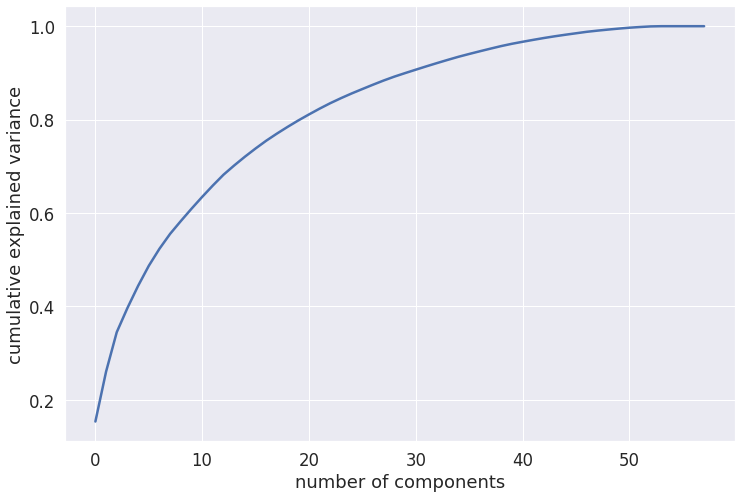

In [ ]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

- Looks like 30 component is enough to explain 90 percent of variance

In [ ]:
# 90 Percent variance 
pc_final=PCA(n_components=30).fit(X_train_res)
df_train_pca=pc_final.fit_transform(X_train_res)

In [ ]:
df_train_pca.shape

(38618, 30)

In [ ]:
X_train_res.shape

(38618, 58)

In [ ]:
cor_matrix = np.corrcoef(df_train_pca.transpose())

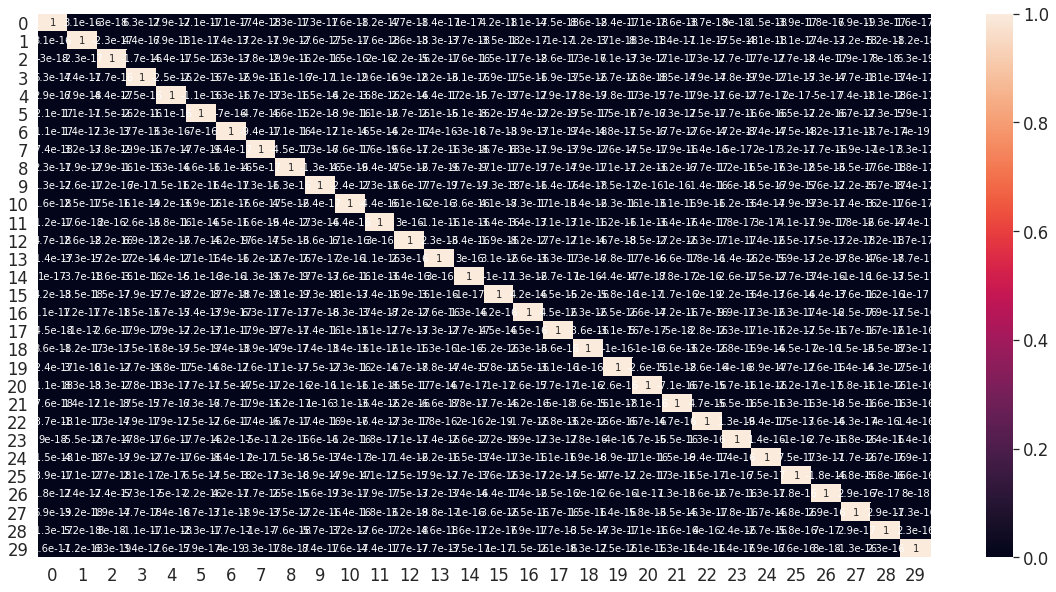

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(cor_matrix,annot = True)

- 30 Component with zero correlation 

### Applying On Test Data 

In [ ]:
df_test_pca = pc_final.fit_transform(X_test)
df_test_pca.shape

(9001, 30)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train_res)

In [ ]:
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.72'

### Random Forest with RFE feature elimination

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
RFC = RandomForestClassifier()
rfe = RFE(RFC, 30)
rfe = rfe.fit(X_df , Y_df)




In [ ]:
print(rfe.support_)          
print(rfe.ranking_) 

[ True  True  True  True  True False  True False  True False False False
  True False False  True False False False  True  True  True  True False
 False False False  True False  True  True  True  True  True False  True
 False  True False  True False  True  True False  True False False False
  True  True  True  True False False False False False  True]
[ 1  1  1  1  1 12  1 24  1 28  2 26  1  4 16  1 27 17 15  1  1  1  1 25
 14 19 29  1 21  1  1  1  1  1  5  1 18  1 22  1 10  1  1  9  1 11  7  6
  1  1  1  1 20  8 13 23  3  1]


In [ ]:
col = X_df.columns[rfe.support_]

In [ ]:
X_df_rfe = X_df[col]
X_df_rfe.shape

(30001, 30)

### Applying Smote and Scaling 

In [ ]:
std_scale = preprocessing.StandardScaler().fit(X_df_rfe)
X_df_rfe_scaled = std_scale.transform(X_df_rfe)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_df_rfe_scaled,Y_df, train_size=0.7,test_size=0.3,random_state=100)

In [ ]:
sm = SMOTE(random_state = 100)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 
print('the shape of X: {}'.format(X_train_res.shape)) 
print('the shape of y: {} \n'.format(y_train_res.shape))

the shape of X: (38618, 30)
the shape of y: (38618,) 



In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train_res,y_train_res)
predictions = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8251
           1       0.58      0.67      0.62       750

    accuracy                           0.93      9001
   macro avg       0.77      0.81      0.79      9001
weighted avg       0.94      0.93      0.93      9001

0.9320075547161426
[[7885  366]
 [ 246  504]]


In [ ]:
print ('Accuracy Score for Random Forest Final Model :', accuracy_score(y_test, predictions))

Accuracy Score for Random Forest Final Model : 0.9320075547161426


In [ ]:
X = X_df_rfe
# Scaling all the variables to a range of 0 to 1

features = X.columns.values
X = pd.DataFrame(std_scale.transform(X))
X.columns = features

importances = rfc.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

NameError: ignored

### Observations:

- From random forest algorithm, Local Incoming for Month 8, Average Revenue Per Customer for Month 8 and Max Recharge Amount for Month 8 are the most important predictor variables to predict churn.

- The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA

#Summary : Telecom Churn
- Very Less Amount of High Value customers are churning which is a good service indicator
- Large no of Customers are new to Telecom Company and fall under < 5 Yr Tenure
- Std Outgoing Calls and Revenue Per Customer are strong indicators of Churn
- People with less than 4 Yrs of Tenure are more likely to Churn
- Behaviour of Volume Based Cost is not a strong indicator of Churn
- Max Recharge Amount could be a good Churn Indicator
- Random Forest is the best method to Predict Churn, other - models too do a fair job
- Behaviour of 8 Month can be the base of Churn Analysis
- Local Incoming and Outgoing Calls for 8th Month and Average Revenue in 8th Month are strong indicators of Churn Behaviour